In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib as mpl
pd.set_option('display.max_columns', None)
import re
import numpy as np
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
mpl.rcParams['figure.figsize'] = (14, 6)
mpl.rcParams['axes.grid'] = True
sns.set_style("darkgrid")

In [67]:
test = pd.read_csv("/content/drive/MyDrive/Major Project/dataset-1/test.csv")
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [68]:
df = pd.read_csv("/content/drive/MyDrive/Major Project/dataset-1/train.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [69]:
print(df.shape)
test.shape

(100000, 28)


(50000, 27)

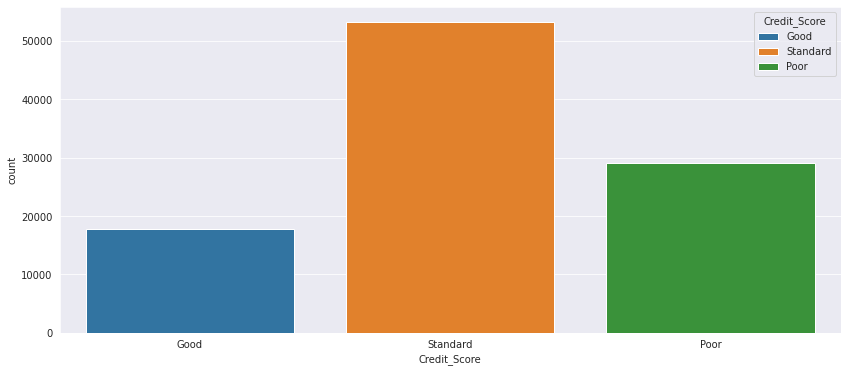

In [70]:
sns.countplot(x='Credit_Score',data=df,dodge=False,hue='Credit_Score')

> Observation: Data is imbalanced.
* Standard is the majority class.
* Good is the minority class.








<h2> Missing value Count </h2>

In [71]:
test.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [72]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Age Feature

In [73]:
print(df['Age'].max())
print(df['Age'].min())

995
-500


In [74]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

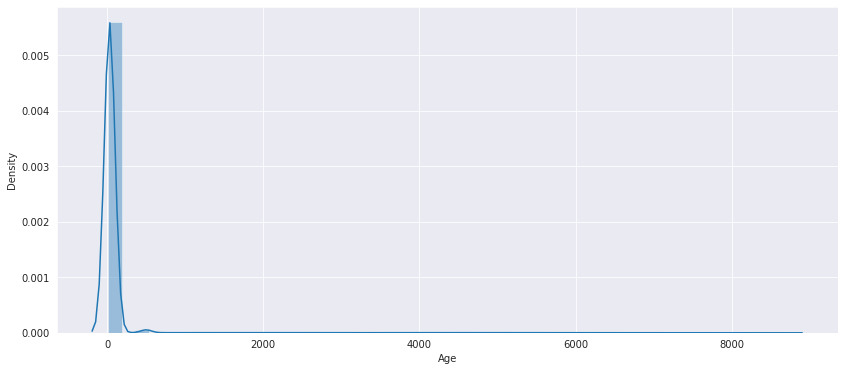

In [75]:
import re
pattern = re.compile(r'[-+]?\d*\.\d+|\d+')
df['Age'] = df['Age'].apply(lambda x:re.findall(pattern,x)[0]).astype(float)
test['Age'] = test['Age'].apply(lambda x:re.findall(pattern,x)[0]).astype(float)
sns.distplot(df['Age'])

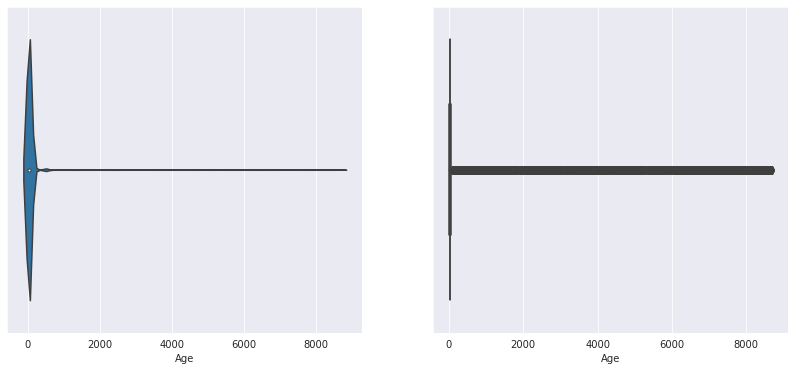

In [76]:
fig,(ax1,ax2) = plt.subplots(1,2)
sns.violinplot(x=df['Age'],ax=ax1)
sns.boxplot(x=df['Age'],ax=ax2)

In [77]:
for i in range(0,101,10):
    print("{} percentile of Age is: {}".format(i,np.percentile(df['Age'],i)))

0 percentile of Age is: 14.0
10 percentile of Age is: 19.0
20 percentile of Age is: 23.0
30 percentile of Age is: 26.0
40 percentile of Age is: 30.0
50 percentile of Age is: 34.0
60 percentile of Age is: 37.0
70 percentile of Age is: 41.0
80 percentile of Age is: 44.0
90 percentile of Age is: 50.0
100 percentile of Age is: 8698.0


In [78]:
for i in range(90,101,1):
    print("{} percentile of Age is: {}".format(i,np.percentile(df['Age'],i)))

90 percentile of Age is: 50.0
91 percentile of Age is: 51.0
92 percentile of Age is: 52.0
93 percentile of Age is: 53.0
94 percentile of Age is: 53.0
95 percentile of Age is: 54.0
96 percentile of Age is: 55.0
97 percentile of Age is: 56.0
98 percentile of Age is: 500.0
99 percentile of Age is: 4112.069999999963
100 percentile of Age is: 8698.0


In [79]:
var = np.sort(df['Age'])
for i in np.arange(0.0, 1.0, 0.1):
    print("{} percentile of Age is: {}".format(97+i,var[int(len(var)*(float(97+i)/100))]))

97.0 percentile of Age is: 56.0
97.1 percentile of Age is: 56.0
97.2 percentile of Age is: 56.0
97.3 percentile of Age is: 471.0
97.4 percentile of Age is: 500.0
97.5 percentile of Age is: 500.0
97.6 percentile of Age is: 500.0
97.7 percentile of Age is: 500.0
97.8 percentile of Age is: 500.0
97.9 percentile of Age is: 500.0


In [80]:
df[(df['Age']>56) & (df['Age']<100)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
28718,0xbe44,CUS_0xc24a,July,Charlieg,99.0,504-49-1795,Entrepreneur,35520.48,2697.040000,3,5,4,0,NaN,5,10,4.63,6.0,_,994.53,26.680333,NaN,No,0.000000,98.86206997691916,!@9#%8,430.8419300230809,Good
38248,0xf61e,CUS_0x7e94,January,Costas Pitasw,95.0,446-63-0451,Engineer,46162.62,3548.885000,10,5,16,2,"Personal Loan, and Debt Consolidation Loan",43,19,6.45,6.0,Bad,1788.63,35.386419,15 Years and 5 Months,Yes,65.956819,288.64584382244783,Low_spent_Small_value_payments,290.28583676908613,Standard
65420,0x19552,CUS_0xdc8,May,NaN,95.0,362-50-3134,_______,28169.69,2171.474167,7,3,15,0,NaN,13,16,_,8.0,_,330.54,28.901025,29 Years and 1 Months,No,0.000000,146.1667164375651,Low_spent_Large_value_payments,340.9807002291016,Standard
78564,0x1e256,CUS_0x1dd3,May,Gerryg,95.0,936-83-6588,Manager,68484.44,NaN,5,7,5,5,"Home Equity Loan, Credit-Builder Loan, Persona...",12,20,12.52,8.0,Standard,105.41,28.430067,12 Years and 5 Months,NM,225.535667,220.00080637187816,High_spent_Small_value_payments,382.86719295400826,Standard


In [81]:
outlier_age = df[df['Age']>100]

In [82]:
pattern = re.compile(r'[^\d]')
outlier_age['Annual_Income'] = outlier_age['Annual_Income'].apply(lambda x:re.sub(pattern,"",x)).astype(float)
print('-'*150)
print("Median Annual Income of people having age > 100: {}".format(outlier_age['Annual_Income'].median()))
print('-'*150)

------------------------------------------------------------------------------------------------------------------------------------------------------
Median Annual Income of people having age > 100: 3854714.5
------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


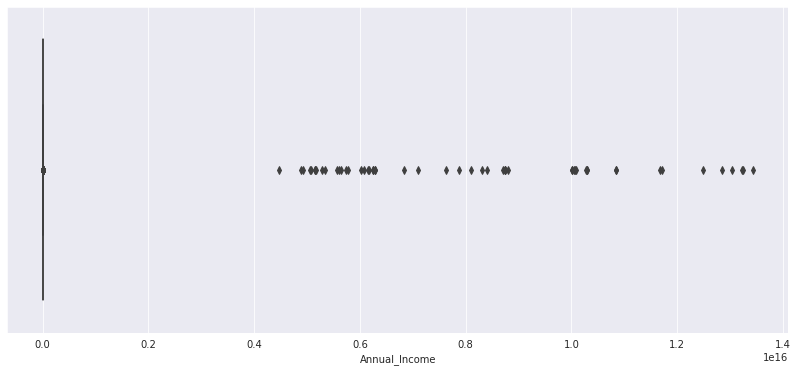

In [83]:
sns.boxplot(outlier_age['Annual_Income'])

In [84]:
outlier_age[outlier_age['Annual_Income'].max() == outlier_age['Annual_Income']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
71661,0x1b9e3,CUS_0x83a1,June,Jessica Wohlg,500.0,963-21-5491,Lawyer,1.343289e+16,11330.075,2,4,8,0,NaN,8,7,3.76,3.0,Good,579.41,26.910118,18 Years and 3 Months,No,0.0,700.9943395772955,Low_spent_Medium_value_payments,712.0131604227049,Standard


In [85]:
df[df['Occupation']=='Lawyer']['Age'].median()

34.0

In [86]:
df['Age'].dtypes

dtype('float64')

In [87]:
free_outlier_age = df[~(df['Age']>100.0)]

In [88]:
age_free_outlier_ser = free_outlier_age.groupby('Occupation')['Age'].agg('median')

In [89]:
age_dict = {}
for content in enumerate(age_free_outlier_ser.iteritems()):
    age_dict.update({content[1][0]:content[1][1]})

In [90]:
age_dict

{'Accountant': 33.0,
 'Architect': 33.0,
 'Developer': 34.0,
 'Doctor': 33.0,
 'Engineer': 32.0,
 'Entrepreneur': 33.0,
 'Journalist': 34.0,
 'Lawyer': 33.0,
 'Manager': 32.0,
 'Mechanic': 33.0,
 'Media_Manager': 33.0,
 'Musician': 34.0,
 'Scientist': 33.0,
 'Teacher': 32.0,
 'Writer': 33.0,
 '_______': 33.0}

In [91]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [92]:
outlier_age['Age'] = outlier_age['Occupation'].apply(lambda x:x if age_dict.get(x) == None else age_dict.get(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
# var = np.sort(outlier_age['Age'])
for i in np.arange(0, 100, 10):
    print("{} percentile of Age is: {}".format(i,np.percentile(outlier_age['Age'],i)))

0 percentile of Age is: 32.0
10 percentile of Age is: 32.0
20 percentile of Age is: 33.0
30 percentile of Age is: 33.0
40 percentile of Age is: 33.0
50 percentile of Age is: 33.0
60 percentile of Age is: 33.0
70 percentile of Age is: 33.0
80 percentile of Age is: 33.0
90 percentile of Age is: 34.0


In [94]:
df = pd.concat([outlier_age,free_outlier_age],axis=0)
df.shape

(100000, 28)

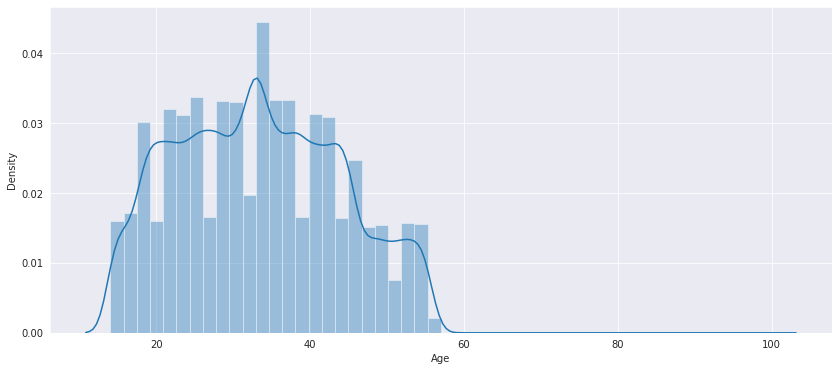

In [95]:
sns.distplot(df['Age'])

In [96]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [97]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1604,CUS_0xd40,March,Aaron Maashoh,33.0,821-00-0265,Scientist,1911412.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
1,0x1656,CUS_0x5407,January,Annk,33.0,500-92-6408,Media_Manager,3408138.0,NaN,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",30,11,17.13,5.0,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
2,0x16ab,CUS_0xff4,February,NaN,33.0,655-05-7666,Entrepreneur,2554626.0,NaN,8,7,14,5,"Not Specified, Student Loan, Student Loan, Cre...",16,13,7.83,NaN,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
3,0x16b8,CUS_0x33d2,March,Chalmersa,33.0,965-46-2491,Scientist,3199378.0,2942.148333,6,6,7,2,"Payday Loan, and Home Equity Loan",8,14,10.28,1.0,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
4,0x1749,CUS_0x3edc,April,Williamso,33.0,663-16-3845,Accountant,4307024.0,3622.186667,3,3,18,1,Debt Consolidation Loan,11,8,8.97,4.0,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard


In [98]:
df.shape

(100000, 28)

In [99]:
print(len(df['SSN'].unique()))
print(len(df['Customer_ID'].unique()))

12501
12500


In [100]:
df.drop(['Customer_ID','Name','SSN'],axis=1,inplace=True)
test.drop(['Customer_ID','Name','SSN'],axis=1,inplace=True)

In [101]:
print(test.shape)
df.shape

(50000, 24)


(100000, 25)

In [102]:
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1604,March,33.0,Scientist,1911412.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
1,0x1656,January,33.0,Media_Manager,3408138.0,NaN,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",30,11,17.13,5.0,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
2,0x16ab,February,33.0,Entrepreneur,2554626.0,NaN,8,7,14,5,"Not Specified, Student Loan, Student Loan, Cre...",16,13,7.83,NaN,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
3,0x16b8,March,33.0,Scientist,3199378.0,2942.148333,6,6,7,2,"Payday Loan, and Home Equity Loan",8,14,10.28,1.0,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
4,0x1749,April,33.0,Accountant,4307024.0,3622.186667,3,3,18,1,Debt Consolidation Loan,11,8,8.97,4.0,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard


### Annual_Income Feature

In [103]:
df['Annual_Income'].unique()

array([1911412.0, 3408138.0, 2554626.0, ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [104]:
pattern = re.compile(r'[-+]?\d*\.\d+|\d+')
df['Annual_Income'] = df['Annual_Income'].astype(str).apply(lambda x:re.findall(pattern,x)[0]).astype(float)
test['Annual_Income'] = test['Annual_Income'].astype(str).apply(lambda x:re.findall(pattern,x)[0]).astype(float)

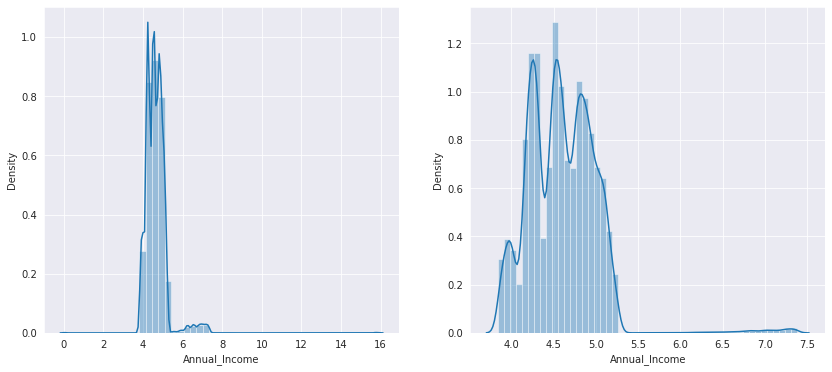

In [105]:
fig,(ax1,ax2)=plt.subplots(1,2)
sns.distplot(np.log10(df['Annual_Income']+0.001),ax=ax1)
sns.distplot(np.log10(test['Annual_Income']+0.001),ax=ax2)

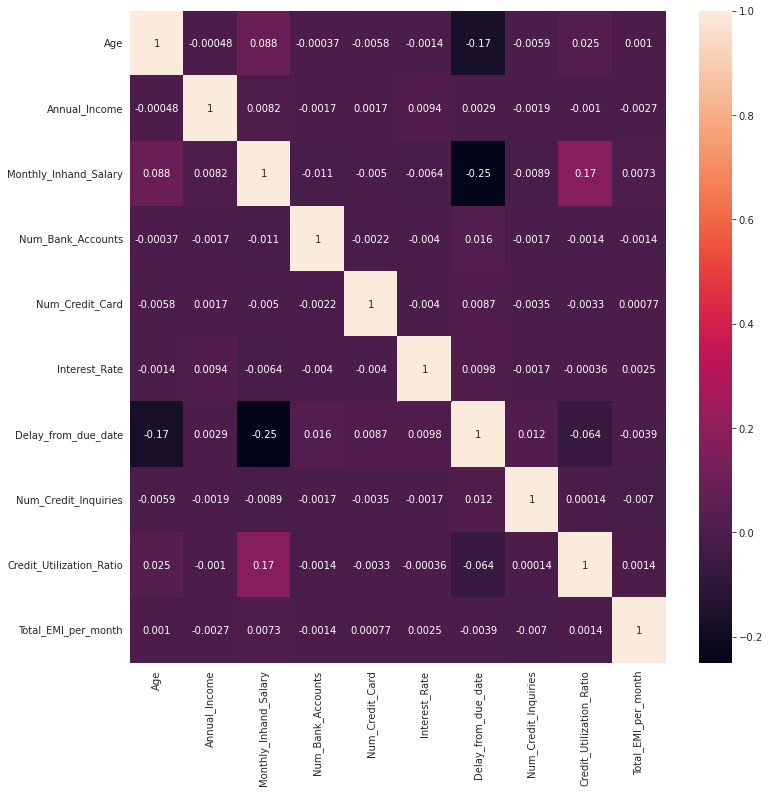

In [106]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [107]:
# Credit_Utilization_Ratio, Changed_Credit_Limit, Num_Credit_Card

In [108]:
# % of missing data
(df['Monthly_Inhand_Salary'].isna().sum()/df.shape[0])*100

15.001999999999999

In [109]:
outlier_sal = df[df['Monthly_Inhand_Salary']>df['Annual_Income']]
non_outlier_sal = df[~(df['Monthly_Inhand_Salary']>df['Annual_Income'])]

In [110]:
non_outlier_sal.shape

(99986, 25)

In [111]:
arr = []
def util(df):
    for i in range(df.shape[0]):
        month_str = str(df['Monthly_Inhand_Salary'].iloc[i])
        mult = len(month_str.split(".")[0])+1
        arr.append(df['Annual_Income'].iloc[i]*(10**(mult)))
    return arr

In [112]:
outlier_sal['Annual_Income'] = util(outlier_sal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
outlier_sal.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
174,0x35e4,March,32.0,Manager,100914.39,8546.5325,5,5,16,5,"Home Equity Loan, Home Equity Loan, Debt Conso...",28,9,19.35,4.0,Standard,1410.49,36.990179,8 Years and 4 Months,Yes,242.966043,260.24869211184983,High_spent_Medium_value_payments,601.4385148933433,Standard
306,0x5082,January,33.0,Writer,100716.36,8413.0300,8,4,17,0,NaN,7,8,5.69,4.0,Standard,605.24,29.861662,16 Years and 1 Months,No,0.000000,442.51366796666855,Low_spent_Large_value_payments,668.7893320333316,Standard
564,0x8b6f,February,32.0,Teacher,100191.36,8058.2800,4,7,6,2,"Student Loan, and Mortgage Loan",28,18,9.61,2.0,_,496.71,30.615907,19 Years and 9 Months,No,145.581445,432.77533467419863,Low_spent_Medium_value_payments,507.4712204871387,Standard
565,0x8b71,April,32.0,Teacher,100191.36,8058.2800,4,7,6,2,"Student Loan, and Mortgage Loan",28,15,9.61,2.0,Standard,496.71,23.938061,19 Years and 11 Months,No,145.581445,527.6491990401898,Low_spent_Medium_value_payments,412.59735612114736,Standard
655,0x9d7b,February,33.0,Media_Manager,108488.61,8773.7175,4,3,14,0,NaN,8,17,4.99,4.0,Standard,1366.18,40.099803,25 Years and 9 Months,Yes,0.000000,132.80947488172615,High_spent_Medium_value_payments,994.5622751182739,Standard


In [114]:
# non_df = pd.concat([outlier_sal,non_outlier_sal],axis=0)
# non_df.head()

df = pd.concat([outlier_sal,non_outlier_sal],axis=0)
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
174,0x35e4,March,32.0,Manager,100914.39,8546.5325,5,5,16,5,"Home Equity Loan, Home Equity Loan, Debt Conso...",28,9,19.35,4.0,Standard,1410.49,36.990179,8 Years and 4 Months,Yes,242.966043,260.24869211184983,High_spent_Medium_value_payments,601.4385148933433,Standard
306,0x5082,January,33.0,Writer,100716.36,8413.0300,8,4,17,0,NaN,7,8,5.69,4.0,Standard,605.24,29.861662,16 Years and 1 Months,No,0.000000,442.51366796666855,Low_spent_Large_value_payments,668.7893320333316,Standard
564,0x8b6f,February,32.0,Teacher,100191.36,8058.2800,4,7,6,2,"Student Loan, and Mortgage Loan",28,18,9.61,2.0,_,496.71,30.615907,19 Years and 9 Months,No,145.581445,432.77533467419863,Low_spent_Medium_value_payments,507.4712204871387,Standard
565,0x8b71,April,32.0,Teacher,100191.36,8058.2800,4,7,6,2,"Student Loan, and Mortgage Loan",28,15,9.61,2.0,Standard,496.71,23.938061,19 Years and 11 Months,No,145.581445,527.6491990401898,Low_spent_Medium_value_payments,412.59735612114736,Standard
655,0x9d7b,February,33.0,Media_Manager,108488.61,8773.7175,4,3,14,0,NaN,8,17,4.99,4.0,Standard,1366.18,40.099803,25 Years and 9 Months,Yes,0.000000,132.80947488172615,High_spent_Medium_value_payments,994.5622751182739,Standard


### Monthly_Inhand_Salary Feature

In [115]:
mon_sal_nan = df[df['Monthly_Inhand_Salary'].isna()]
mon_sal = df[~df['Monthly_Inhand_Salary'].isna()]

In [116]:
test_mon_sal_nan = test[test['Monthly_Inhand_Salary'].isna()]
test_mon_sal = test[~test['Monthly_Inhand_Salary'].isna()]

In [117]:
mon_sal_nan.shape[0]

15002

In [118]:
mon_sal_groupby = mon_sal.groupby('Occupation')['Monthly_Inhand_Salary'].median()
mon_sal_groupby.head()

Occupation
Accountant    3206.285000
Architect     3147.645000
Developer     3007.490624
Doctor        3049.826667
Engineer      3217.785000
Name: Monthly_Inhand_Salary, dtype: float64

In [119]:
mon_sal_dict = {}
for content in enumerate(mon_sal_groupby.iteritems()):
    mon_sal_dict.update({content[1][0]:content[1][1]})

In [120]:
mon_sal_nan['Monthly_Inhand_Salary'] = mon_sal_nan['Occupation'].apply(lambda x:x if mon_sal_dict.get(x) == None else mon_sal_dict.get(x))
test_mon_sal_nan['Monthly_Inhand_Salary'] = test_mon_sal_nan['Occupation'].apply(lambda x:x if mon_sal_dict.get(x) == None else mon_sal_dict.get(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
test = pd.concat([test_mon_sal,test_mon_sal_nan],axis=0)
print(test.shape)
df.head()

(50000, 24)


,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
174,0x35e4,March,32.0,Manager,100914.39,8546.5325,5,5,16,5,"Home Equity Loan, Home Equity Loan, Debt Conso...",28,9,19.35,4.0,Standard,1410.49,36.990179,8 Years and 4 Months,Yes,242.966043,260.24869211184983,High_spent_Medium_value_payments,601.4385148933433,Standard
306,0x5082,January,33.0,Writer,100716.36,8413.0300,8,4,17,0,NaN,7,8,5.69,4.0,Standard,605.24,29.861662,16 Years and 1 Months,No,0.000000,442.51366796666855,Low_spent_Large_value_payments,668.7893320333316,Standard
564,0x8b6f,February,32.0,Teacher,100191.36,8058.2800,4,7,6,2,"Student Loan, and Mortgage Loan",28,18,9.61,2.0,_,496.71,30.615907,19 Years and 9 Months,No,145.581445,432.77533467419863,Low_spent_Medium_value_payments,507.4712204871387,Standard
565,0x8b71,April,32.0,Teacher,100191.36,8058.2800,4,7,6,2,"Student Loan, and Mortgage Loan",28,15,9.61,2.0,Standard,496.71,23.938061,19 Years and 11 Months,No,145.581445,527.6491990401898,Low_spent_Medium_value_payments,412.59735612114736,Standard
655,0x9d7b,February,33.0,Media_Manager,108488.61,8773.7175,4,3,14,0,NaN,8,17,4.99,4.0,Standard,1366.18,40.099803,25 Years and 9 Months,Yes,0.000000,132.80947488172615,High_spent_Medium_value_payments,994.5622751182739,Standard


In [122]:
df = pd.concat([mon_sal,mon_sal_nan],axis=0)
print(df.shape)
df.head()

(100000, 25)


,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
174,0x35e4,March,32.0,Manager,100914.39,8546.5325,5,5,16,5,"Home Equity Loan, Home Equity Loan, Debt Conso...",28,9,19.35,4.0,Standard,1410.49,36.990179,8 Years and 4 Months,Yes,242.966043,260.24869211184983,High_spent_Medium_value_payments,601.4385148933433,Standard
306,0x5082,January,33.0,Writer,100716.36,8413.0300,8,4,17,0,NaN,7,8,5.69,4.0,Standard,605.24,29.861662,16 Years and 1 Months,No,0.000000,442.51366796666855,Low_spent_Large_value_payments,668.7893320333316,Standard
564,0x8b6f,February,32.0,Teacher,100191.36,8058.2800,4,7,6,2,"Student Loan, and Mortgage Loan",28,18,9.61,2.0,_,496.71,30.615907,19 Years and 9 Months,No,145.581445,432.77533467419863,Low_spent_Medium_value_payments,507.4712204871387,Standard
565,0x8b71,April,32.0,Teacher,100191.36,8058.2800,4,7,6,2,"Student Loan, and Mortgage Loan",28,15,9.61,2.0,Standard,496.71,23.938061,19 Years and 11 Months,No,145.581445,527.6491990401898,Low_spent_Medium_value_payments,412.59735612114736,Standard
655,0x9d7b,February,33.0,Media_Manager,108488.61,8773.7175,4,3,14,0,NaN,8,17,4.99,4.0,Standard,1366.18,40.099803,25 Years and 9 Months,Yes,0.000000,132.80947488172615,High_spent_Medium_value_payments,994.5622751182739,Standard


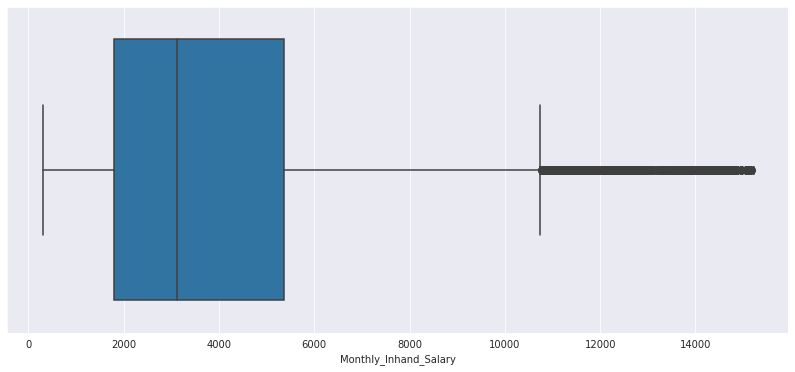

In [123]:
sns.boxplot(df['Monthly_Inhand_Salary'])

In [124]:
df.dtypes

ID                           object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

### Num_of_Loan Feature

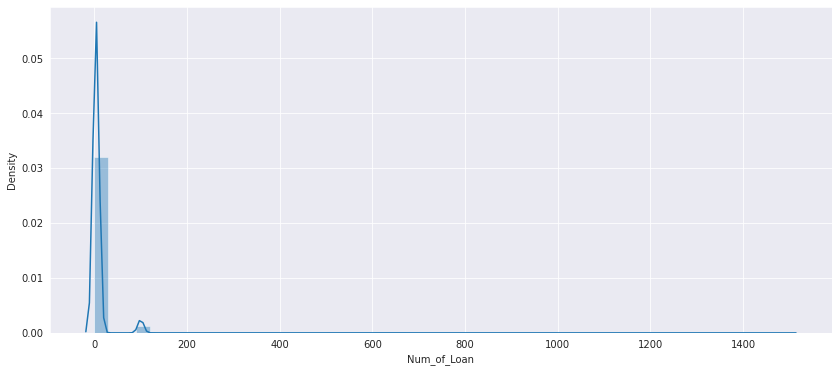

In [125]:
pattern = re.compile(r'[-+]?\d*\.\d+|\d+')
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x:re.findall(pattern,x)[0]).astype(float)
test['Num_of_Loan'] = test['Num_of_Loan'].apply(lambda x:re.findall(pattern,x)[0]).astype(float)
sns.distplot(df['Num_of_Loan'])

### Num_of_Delayed_Payment

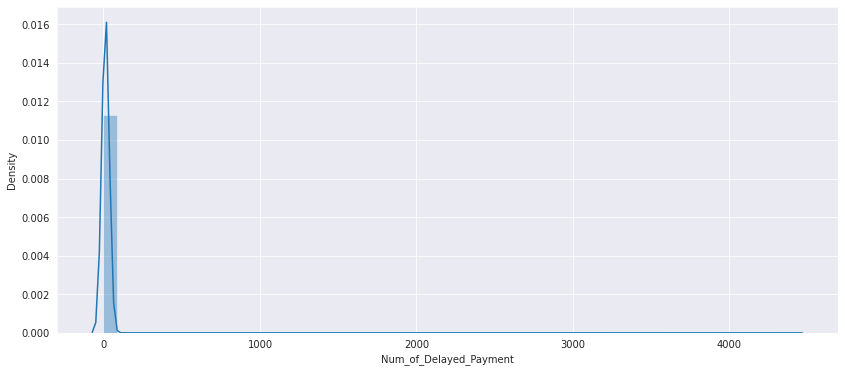

In [126]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace("_","").astype(float)
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].str.replace("_","").astype(float)
sns.distplot(df['Num_of_Delayed_Payment'])

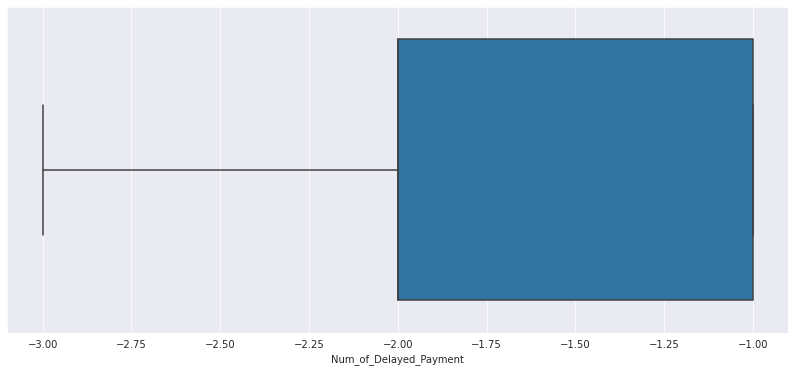

In [127]:
temp = df[(df['Num_of_Delayed_Payment'] < 0)]['Num_of_Delayed_Payment']
sns.boxplot(temp)

In [128]:
df = df.drop(df[df['Num_of_Delayed_Payment']<0].index,axis=0)

In [129]:
Num_of_Delayed_Payment_nan = df[df['Num_of_Delayed_Payment'].isna()]
print(Num_of_Delayed_Payment_nan.shape)
Num_of_Delayed_Payment_nan.head()

(7002, 25)


,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1202,0x11595,April,32.0,Teacher,102910.11,8707.842500,7,6,11,2.0,"Home Equity Loan, and Mortgage Loan",29,NaN,19.1,5.0,_,930.24,41.352865,20 Years and 0 Months,Yes,166.048320,169.90154376578326,High_spent_Large_value_payments,774.8343859851338,Poor
9,0x17ee,January,33.0,Accountant,3078844.00,2623.703333,7,9,31,6.0,"Credit-Builder Loan, Payday Loan, Home Equity ...",49,NaN,21.73,9.0,Bad,3470.08,24.616735,1 Years and 2 Months,Yes,114.533021,232.13881681232448,Low_spent_Large_value_payments,185.69849562207088,Standard
24,0x1a7b,June,33.0,Scientist,6232056.00,5068.380000,9,9,18,5.0,"Debt Consolidation Loan, Home Equity Loan, Aut...",23,NaN,17.24,15.0,Bad,3589.56,34.750278,1 Years and 9 Months,Yes,171.345560,NaN,High_spent_Medium_value_payments,513.5324195611067,Standard
29,0x1bd3,February,34.0,Musician,6353698.00,5382.748333,4,5,12,2.0,"Debt Consolidation Loan, and Auto Loan",33,NaN,14.78,4.0,Standard,89.62,35.395978,30 Years and 10 Months,Yes,69.100853,36.732411953841904,High_spent_Large_value_payments,672.4415688486679,Standard
38,0x1d59,August,33.0,Doctor,15488885.00,1273.740417,0,4,4,0.0,NaN,10,NaN,1.38,9.0,Good,1287.59,39.432106,25 Years and 9 Months,No,0.000000,155.91866746968122,Low_spent_Small_value_payments,261.45537419698553,Good


### Changed_Credit_Limit Feature

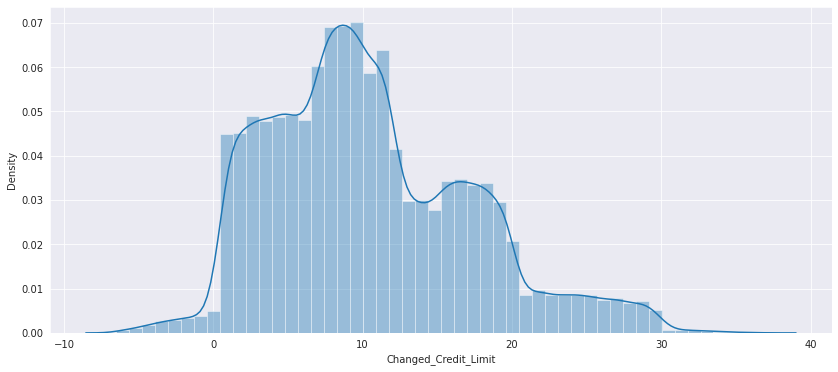

In [130]:
pattern = re.compile(r'[-+]?\d*\.\d+|\d+')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace("_","")
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].str.replace("_","")
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x :float(x) if len(x)>=1 else np.nan)
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].apply(lambda x :float(x) if len(x)>=1 else np.nan)
sns.distplot(df['Changed_Credit_Limit'])

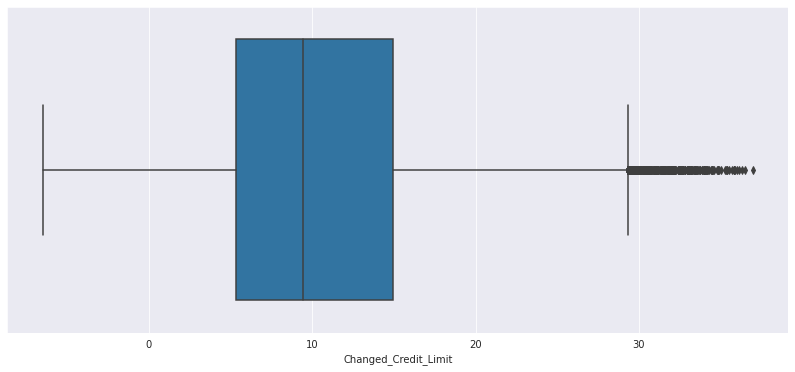

In [131]:
df['Changed_Credit_Limit'].isna().sum()
sns.boxplot(df['Changed_Credit_Limit'])

In [132]:
credit_limit_nan = df[df['Changed_Credit_Limit'].isna()]
credit_limit_nan['Occupation'].value_counts()

_______          157
Lawyer           150
Engineer         140
Accountant       135
Entrepreneur     133
Manager          132
Journalist       131
Scientist        127
Media_Manager    126
Teacher          125
Writer           125
Developer        122
Doctor           119
Mechanic         119
Musician         118
Architect        112
Name: Occupation, dtype: int64

In [133]:
credit_limit = df[~df['Changed_Credit_Limit'].isna()]
credit_limit_groupby = credit_limit.groupby('Occupation')['Changed_Credit_Limit'].median().head()

In [134]:
credit_limit_nan['Occupation']

5        Scientist
114      Architect
204        _______
227        _______
249        _______
           ...    
98121       Lawyer
98482       Writer
98783     Mechanic
99808    Developer
99898      _______
Name: Occupation, Length: 2071, dtype: object

In [135]:
credit_limit_dict = {}
for content in enumerate(credit_limit_groupby.iteritems()):
    credit_limit_dict.update({content[1][0]:content[1][1]})
credit_limit_dict

{'Accountant': 9.73,
 'Architect': 9.18,
 'Developer': 9.65,
 'Doctor': 9.38,
 'Engineer': 9.67}

In [136]:
credit_limit_nan[['Changed_Credit_Limit','Occupation']]

,Changed_Credit_Limit,Occupation
5,NaN,Scientist
114,NaN,Architect
204,NaN,_______
227,NaN,_______
249,NaN,_______
...,...,...
98121,NaN,Lawyer
98482,NaN,Writer
98783,NaN,Mechanic
99808,NaN,Developer


In [137]:
import math
def fillna(df):
    
    for index,row in df.iterrows():
        if math.isnan(row['Changed_Credit_Limit']) and credit_limit_dict.get(row['Occupation'])!=None:
            df['Changed_Credit_Limit'].loc[index] = credit_limit_dict.get(row['Occupation'])
        else:
            df['Changed_Credit_Limit'].loc[index] = df['Changed_Credit_Limit'].loc[index]

In [138]:
test_credit_limit_nan = test[test['Changed_Credit_Limit'].isna()]
test_credit_limit = test[~test['Changed_Credit_Limit'].isna()]

In [139]:
fillna(credit_limit_nan)
fillna(test_credit_limit_nan)
credit_limit_nan.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,0x176d,April,33.0,Scientist,2018602.0,1684.168333,1,5,1,2.0,"Auto Loan, and Home Equity Loan",5,6.0,NaN,4.0,Good,413.32,22.743582,18 Years and 6 Months,No,29.534584,104.72383354456407,High_spent_Small_value_payments,294.1584160682732,Good
114,0x2b21,August,33.0,Architect,7625752.0,6383.793333,7,9,24,9.0,"Student Loan, Mortgage Loan, Auto Loan, Auto L...",48,19.0,9.18,12.0,_,2828.24,29.484380,6 Years and 6 Months,Yes,346.296700,180.7895808567629,!@9#%8,371.2930528511517,Poor
204,0x3c0a,May,33.0,_______,2914388.0,2257.656667,8,1165,14,3.0,"Payday Loan, Auto Loan, and Credit-Builder Loan",10,10.0,NaN,4.0,Standard,518.69,39.470542,15 Years and 8 Months,No,45.607025,126.15756554043531,Low_spent_Large_value_payments,324.0010765794081,Standard
227,0x405a,May,33.0,_______,3210752.0,2537.626667,9,9,16,3.0,"Student Loan, Payday Loan, and Not Specified",24,24.0,NaN,9.0,_,1295.13,31.595624,7 Years and 7 Months,NM,70.571823,241.8522424314041,Low_spent_Small_value_payments,231.3386012226157,Poor
249,0x4430,March,33.0,_______,1559068.0,1298.223333,7,9,26,100.0,"Mortgage Loan, Credit-Builder Loan, Personal L...",47,19.0,NaN,7.0,Bad,4746.44,32.625914,NaN,Yes,92.889365,83.95577555843458,Low_spent_Medium_value_payments,232.97719293250358,Standard


In [140]:
credit_limit_nan['Changed_Credit_Limit'].isna().sum()

1443

In [141]:
test = pd.concat([test_credit_limit_nan,test_credit_limit],axis=0)
median_value = test['Changed_Credit_Limit'].median()
test['Changed_Credit_Limit'].fillna(median_value,inplace=True)
test.isna().sum()

ID                             0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [142]:
temp = credit_limit_nan[~credit_limit_nan['Changed_Credit_Limit'].isna()]
credit_limit = pd.concat([credit_limit,temp],axis=0)
credit_limit.shape

(97913, 25)

In [143]:
credit_limit_nan.drop(credit_limit_nan[~credit_limit_nan['Changed_Credit_Limit'].isna()].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
df = pd.concat([credit_limit_nan,credit_limit],axis=0)
print(df.shape)
df.head()

(99356, 25)


,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,0x176d,April,33.0,Scientist,2018602.0,1684.168333,1,5,1,2.0,"Auto Loan, and Home Equity Loan",5,6.0,NaN,4.0,Good,413.32,22.743582,18 Years and 6 Months,No,29.534584,104.72383354456407,High_spent_Small_value_payments,294.1584160682732,Good
204,0x3c0a,May,33.0,_______,2914388.0,2257.656667,8,1165,14,3.0,"Payday Loan, Auto Loan, and Credit-Builder Loan",10,10.0,NaN,4.0,Standard,518.69,39.470542,15 Years and 8 Months,No,45.607025,126.15756554043531,Low_spent_Large_value_payments,324.0010765794081,Standard
227,0x405a,May,33.0,_______,3210752.0,2537.626667,9,9,16,3.0,"Student Loan, Payday Loan, and Not Specified",24,24.0,NaN,9.0,_,1295.13,31.595624,7 Years and 7 Months,NM,70.571823,241.8522424314041,Low_spent_Small_value_payments,231.3386012226157,Poor
249,0x4430,March,33.0,_______,1559068.0,1298.223333,7,9,26,100.0,"Mortgage Loan, Credit-Builder Loan, Personal L...",47,19.0,NaN,7.0,Bad,4746.44,32.625914,NaN,Yes,92.889365,83.95577555843458,Low_spent_Medium_value_payments,232.97719293250358,Standard
467,0x761f,June,33.0,Mechanic,833345.0,6918.541667,5,1303,3,3.0,"Debt Consolidation Loan, Mortgage Loan, and Ho...",2,3.0,NaN,4.0,_,1188.93,39.072946,19 Years and 7 Months,No,168.131731,139.5714244019921,High_spent_Large_value_payments,624.1510108491508,Standard


In [145]:
df.dtypes

ID                           object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [146]:
test.isna().sum()

ID                             0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [147]:
df.isna().sum()

ID                              0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11273
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         1443
Num_Credit_Inquiries         1951
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8978
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4453
Payment_Behaviour               0
Monthly_Balance              1193
Credit_Score                    0
dtype: int64

### Type_of_Loan_missing Feature

In [148]:
df.shape

(99356, 25)

In [149]:
df['Type_of_Loan_missing'] = df['Type_of_Loan'].apply(lambda x:0 if x == x else 1)
test['Type_of_Loan_missing'] = test['Type_of_Loan'].apply(lambda x:0 if x == x else 1)
df['Type_of_Loan_missing'].value_counts()

0    88083
1    11273
Name: Type_of_Loan_missing, dtype: int64

In [150]:
df['Type_of_Loan']

5                          Auto Loan, and Home Equity Loan
204        Payday Loan, Auto Loan, and Credit-Builder Loan
227           Student Loan, Payday Loan, and Not Specified
249      Mortgage Loan, Credit-Builder Loan, Personal L...
467      Debt Consolidation Loan, Mortgage Loan, and Ho...
                               ...                        
94735                                                  NaN
95127           Debt Consolidation Loan, and Mortgage Loan
96999    Debt Consolidation Loan, Student Loan, Not Spe...
97584    Not Specified, Credit-Builder Loan, and Studen...
99808    Student Loan, Mortgage Loan, Debt Consolidatio...
Name: Type_of_Loan, Length: 99356, dtype: object

In [151]:
types_of_loan = df[~df['Type_of_Loan'].isna()]
types_of_loan_nan = df[df['Type_of_Loan'].isna()]

In [152]:
from collections import Counter
unique_occ = types_of_loan['Occupation'].unique()
occu_loan_group = types_of_loan.groupby('Occupation')['Type_of_Loan']
type_of_loan_dict = {}

for occ in unique_occ:
    loan = []
    val = occu_loan_group.get_group(occ).values
    for t in val:
        loan.extend(str(t).split(","))
    
    res = Counter(loan).most_common(3)
    type_of_loan_dict[occ] = [ x[0] for x in res]
    

In [153]:
type_of_loan_dict

{'Accountant': [' Mortgage Loan',
  ' Debt Consolidation Loan',
  ' Credit-Builder Loan'],
 'Architect': [' Payday Loan', ' Credit-Builder Loan', ' Home Equity Loan'],
 'Developer': [' Mortgage Loan', ' Credit-Builder Loan', ' Personal Loan'],
 'Doctor': [' Not Specified', ' Payday Loan', ' Mortgage Loan'],
 'Engineer': [' Auto Loan', ' Credit-Builder Loan', ' Not Specified'],
 'Entrepreneur': [' Mortgage Loan', ' Home Equity Loan', ' Auto Loan'],
 'Journalist': [' Student Loan', ' Credit-Builder Loan', ' Home Equity Loan'],
 'Lawyer': [' Personal Loan', ' Credit-Builder Loan', ' Not Specified'],
 'Manager': [' Home Equity Loan', ' Mortgage Loan', ' Credit-Builder Loan'],
 'Mechanic': [' Home Equity Loan', ' Student Loan', ' Not Specified'],
 'Media_Manager': [' Credit-Builder Loan',
  ' Debt Consolidation Loan',
  ' Payday Loan'],
 'Musician': [' Not Specified', ' Home Equity Loan', ' Payday Loan'],
 'Scientist': [' Student Loan', ' Credit-Builder Loan', ' Auto Loan'],
 'Teacher': [' 

In [154]:
def fillna_type_of_loan(data):
    for index,row in data.iterrows():
        # print
        data.at[index,'Type_of_Loan'] = ",".join(type_of_loan_dict[data.at[index,'Occupation']])

In [155]:
test_types_of_loan_nan = test[test['Type_of_Loan'].isna()]
test_types_of_loan = test[~test['Type_of_Loan'].isna()]

In [156]:
fillna_type_of_loan(types_of_loan_nan)
fillna_type_of_loan(test_types_of_loan_nan)
types_of_loan_nan.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_missing
516,0x7fd1,April,34.0,Journalist,7214532.00,5822.110000,1,6,10,0.0,"Student Loan, Credit-Builder Loan, Home Equit...",8,10.0,NaN,0.0,_,1285.49,29.640210,27 Years and 1 Months,No,0.0,226.1216690901501,High_spent_Medium_value_payments,606.0893309098501,Standard,1
1168,0x10db3,February,33.0,_______,367799.00,2854.991667,5,4,10,0.0,"Not Specified, Payday Loan, Mortgage Loan",29,4051.0,NaN,6.0,Good,1015.81,40.960209,26 Years and 0 Months,No,0.0,24.438896428651795,High_spent_Large_value_payments,501.0602702380149,Standard,1
2453,0x21c8f,June,33.0,_______,1392944.00,11380.866667,3,3,9,0.0,"Not Specified, Payday Loan, Mortgage Loan",10,0.0,NaN,3.0,Good,499.06,26.929524,21 Years and 4 Months,No,0.0,1136.2687198440562,Low_spent_Medium_value_payments,281.81794682261057,Good,1
2532,0x22f04,March,33.0,Entrepreneur,1525895.00,1508.579167,3,6,1,0.0,"Mortgage Loan, Home Equity Loan, Auto Loan",1,5.0,NaN,5.0,Good,1075.37,34.725521,23 Years and 5 Months,NM,0.0,55.25833376720422,Low_spent_Medium_value_payments,375.5995828994625,Good,1
2949,0x170b,February,20.0,Entrepreneur,106733.13,8873.427500,4,4,1,0.0,"Mortgage Loan, Home Equity Loan, Auto Loan",5,7.0,NaN,0.0,_,76.23,28.108086,32 Years and 10 Months,No,0.0,807.2067768357648,Low_spent_Small_value_payments,370.1359731642354,Good,1


In [157]:
test = pd.concat([test_types_of_loan_nan,test_types_of_loan],axis=0)
print(test.shape)
test

(50000, 25)


,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Type_of_Loan_missing
493,0x1bcf,October,49.0,Media_Manager,94554.87,7914.572500,2,6,2,0.0,"Credit-Builder Loan, Debt Consolidation Loan,...",11,1314.0,9.43,3.0,_,1487.9,35.229642,22 Years and 10 Months,No,0.000000,511.4374161753582,Low_spent_Large_value_payments,550.0198338246418,1
773,0x1f17,October,19.0,_______,97961.96,8205.496667,4,6,6,0.0,"Not Specified, Payday Loan, Mortgage Loan",5,2849.0,9.43,3.0,Good,750.95,25.476098,28 Years and 11 Months,No,0.000000,767.609241471229,Low_spent_Medium_value_payments,332.9404251954378,1
774,0x1f18,November,20.0,Lawyer,97961.96,8205.496667,4,6,6,0.0,"Personal Loan, Credit-Builder Loan, Not Speci...",7,10.0,9.43,3.0,Good,750.95,38.499224,29 Years and 0 Months,No,0.000000,745.1152438240077,Low_spent_Medium_value_payments,355.43442284265893,1
1372,0x261e,September,20.0,Scientist,54987.52,4762.293333,4,5,10,0.0,"Student Loan, Credit-Builder Loan, Auto Loan",18,13.0,9.43,8.0,_,1263.12,34.123116,16 Years and 10 Months,Yes,0.000000,540.1106933615786,Low_spent_Small_value_payments,226.11863997175487,1
1744,0x2a7a,September,43.0,Architect,41499.21,3582.267500,0,5,5,0.0,"Payday Loan, Credit-Builder Loan, Home Equity...",4,6.0,9.18,4.0,Good,1272.15,35.555339,15 Years and 11 Months,NM,0.000000,75.00058699886117,High_spent_Large_value_payments,523.226163001139,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49964,0x25f8e,September,38.0,Manager,15319.65,3238.930000,6,7,15,4.0,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16.0,17.13,6.0,Bad,1453.61,37.594799,11 Years and 5 Months,NM,28.182033,72.24869934974821,Low_spent_Small_value_payments,335.63301726379916,0
49983,0x25fc1,December,19.0,Lawyer,42903.79,2902.293333,0,4,6,1.0,Not Specified,14,0.0,5.10,NaN,_,1079.48,33.086814,29 Years and 0 Months,No,34.975457,256.30992174442514,Low_spent_Large_value_payments,325.5462048948669,0
49987,0x25fcd,December,45.0,Media_Manager,16680.35,3150.334167,1,1,5,4.0,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,0.0,3.69,8.0,_,897.16,25.793227,22 Years and 0 Months,NM,41.113561,40.89305193681736,Low_spent_Large_value_payments,340.79630413992334,0
49996,0x25fee,September,25.0,Mechanic,39628.99,3074.806667,4,6,7,2.0,"Auto Loan, and Student Loan",20,NaN,11.50,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,0


In [158]:
df = pd.concat([types_of_loan,types_of_loan_nan],axis=0)
print(df.isnull().sum())
df.head()

ID                             0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        1443
Num_Credit_Inquiries        1951
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          8978
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4453
Payment_Behaviour              0
Monthly_Balance             1193
Credit_Score                   0
Type_of_Loan_missing           0
dtype: int64


,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_missing
5,0x176d,April,33.0,Scientist,2018602.0,1684.168333,1,5,1,2.0,"Auto Loan, and Home Equity Loan",5,6.0,NaN,4.0,Good,413.32,22.743582,18 Years and 6 Months,No,29.534584,104.72383354456407,High_spent_Small_value_payments,294.1584160682732,Good,0
204,0x3c0a,May,33.0,_______,2914388.0,2257.656667,8,1165,14,3.0,"Payday Loan, Auto Loan, and Credit-Builder Loan",10,10.0,NaN,4.0,Standard,518.69,39.470542,15 Years and 8 Months,No,45.607025,126.15756554043531,Low_spent_Large_value_payments,324.0010765794081,Standard,0
227,0x405a,May,33.0,_______,3210752.0,2537.626667,9,9,16,3.0,"Student Loan, Payday Loan, and Not Specified",24,24.0,NaN,9.0,_,1295.13,31.595624,7 Years and 7 Months,NM,70.571823,241.8522424314041,Low_spent_Small_value_payments,231.3386012226157,Poor,0
249,0x4430,March,33.0,_______,1559068.0,1298.223333,7,9,26,100.0,"Mortgage Loan, Credit-Builder Loan, Personal L...",47,19.0,NaN,7.0,Bad,4746.44,32.625914,NaN,Yes,92.889365,83.95577555843458,Low_spent_Medium_value_payments,232.97719293250358,Standard,0
467,0x761f,June,33.0,Mechanic,833345.0,6918.541667,5,1303,3,3.0,"Debt Consolidation Loan, Mortgage Loan, and Ho...",2,3.0,NaN,4.0,_,1188.93,39.072946,19 Years and 7 Months,No,168.131731,139.5714244019921,High_spent_Large_value_payments,624.1510108491508,Standard,0


In [159]:
def create_corpus(data):
    corpus = set()
    for index,row in data.iterrows():
        if row['Type_of_Loan'] == row['Type_of_Loan']:
            word_list = row['Type_of_Loan'].split(",")
            corpus.update(set([word.strip().lower() for word in word_list]))
    return list(corpus)


In [160]:
corpus = create_corpus(df)
print(corpus)
print(len(corpus))

['and home equity loan', 'not specified', 'and debt consolidation loan', 'and not specified', 'mortgage loan', 'and personal loan', 'personal loan', 'auto loan', 'and mortgage loan', 'home equity loan', 'debt consolidation loan', 'student loan', 'and auto loan', 'payday loan', 'and credit-builder loan', 'credit-builder loan', 'and student loan', 'and payday loan']
18


In [161]:
def create_feature(data,corpus):
    for index,row in data.iterrows():
        if row['Type_of_Loan'] == row['Type_of_Loan']:
            feature_list = list(set([word.strip().lower() for word in row['Type_of_Loan'].split(",")]))
            for feature in corpus:
                if feature in feature_list:
                    data.at[index,feature] = 1
                else:
                    data.at[index,feature] = 0

In [162]:
create_feature(df,corpus)
create_feature(test,corpus)

In [163]:
test.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Type_of_Loan_missing,and home equity loan,not specified,and debt consolidation loan,and not specified,mortgage loan,and personal loan,personal loan,auto loan,and mortgage loan,home equity loan,debt consolidation loan,student loan,and auto loan,payday loan,and credit-builder loan,credit-builder loan,and student loan,and payday loan
493,0x1bcf,October,49.0,Media_Manager,94554.87,7914.572500,2,6,2,0.0,"Credit-Builder Loan, Debt Consolidation Loan,...",11,1314.0,9.43,3.0,_,1487.9,35.229642,22 Years and 10 Months,No,0.0,511.4374161753582,Low_spent_Large_value_payments,550.0198338246418,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
773,0x1f17,October,19.0,_______,97961.96,8205.496667,4,6,6,0.0,"Not Specified, Payday Loan, Mortgage Loan",5,2849.0,9.43,3.0,Good,750.95,25.476098,28 Years and 11 Months,No,0.0,767.609241471229,Low_spent_Medium_value_payments,332.9404251954378,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
774,0x1f18,November,20.0,Lawyer,97961.96,8205.496667,4,6,6,0.0,"Personal Loan, Credit-Builder Loan, Not Speci...",7,10.0,9.43,3.0,Good,750.95,38.499224,29 Years and 0 Months,No,0.0,745.1152438240077,Low_spent_Medium_value_payments,355.43442284265893,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1372,0x261e,September,20.0,Scientist,54987.52,4762.293333,4,5,10,0.0,"Student Loan, Credit-Builder Loan, Auto Loan",18,13.0,9.43,8.0,_,1263.12,34.123116,16 Years and 10 Months,Yes,0.0,540.1106933615786,Low_spent_Small_value_payments,226.11863997175487,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1744,0x2a7a,September,43.0,Architect,41499.21,3582.267500,0,5,5,0.0,"Payday Loan, Credit-Builder Loan, Home Equity...",4,6.0,9.18,4.0,Good,1272.15,35.555339,15 Years and 11 Months,NM,0.0,75.00058699886117,High_spent_Large_value_payments,523.226163001139,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [164]:
test.isnull().sum()

ID                                0
Month                             0
Age                               0
Occupation                        0
Annual_Income                     0
Monthly_Inhand_Salary             0
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Interest_Rate                     0
Num_of_Loan                       0
Type_of_Loan                      0
Delay_from_due_date               0
Num_of_Delayed_Payment         3498
Changed_Credit_Limit              0
Num_Credit_Inquiries           1035
Credit_Mix                        0
Outstanding_Debt                  0
Credit_Utilization_Ratio          0
Credit_History_Age             4470
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly        2271
Payment_Behaviour                 0
Monthly_Balance                 562
Type_of_Loan_missing              0
and home equity loan              0
not specified                     0
and debt consolidation loan 

In [165]:
df.isnull().sum()

ID                                0
Month                             0
Age                               0
Occupation                        0
Annual_Income                     0
Monthly_Inhand_Salary             0
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Interest_Rate                     0
Num_of_Loan                       0
Type_of_Loan                      0
Delay_from_due_date               0
Num_of_Delayed_Payment         7002
Changed_Credit_Limit           1443
Num_Credit_Inquiries           1951
Credit_Mix                        0
Outstanding_Debt                  0
Credit_Utilization_Ratio          0
Credit_History_Age             8978
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly        4453
Payment_Behaviour                 0
Monthly_Balance                1193
Credit_Score                      0
Type_of_Loan_missing              0
and home equity loan              0
not specified               

In [166]:
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_missing,and home equity loan,not specified,and debt consolidation loan,and not specified,mortgage loan,and personal loan,personal loan,auto loan,and mortgage loan,home equity loan,debt consolidation loan,student loan,and auto loan,payday loan,and credit-builder loan,credit-builder loan,and student loan,and payday loan
5,0x176d,April,33.0,Scientist,2018602.0,1684.168333,1,5,1,2.0,"Auto Loan, and Home Equity Loan",5,6.0,NaN,4.0,Good,413.32,22.743582,18 Years and 6 Months,No,29.534584,104.72383354456407,High_spent_Small_value_payments,294.1584160682732,Good,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0x3c0a,May,33.0,_______,2914388.0,2257.656667,8,1165,14,3.0,"Payday Loan, Auto Loan, and Credit-Builder Loan",10,10.0,NaN,4.0,Standard,518.69,39.470542,15 Years and 8 Months,No,45.607025,126.15756554043531,Low_spent_Large_value_payments,324.0010765794081,Standard,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
227,0x405a,May,33.0,_______,3210752.0,2537.626667,9,9,16,3.0,"Student Loan, Payday Loan, and Not Specified",24,24.0,NaN,9.0,_,1295.13,31.595624,7 Years and 7 Months,NM,70.571823,241.8522424314041,Low_spent_Small_value_payments,231.3386012226157,Poor,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
249,0x4430,March,33.0,_______,1559068.0,1298.223333,7,9,26,100.0,"Mortgage Loan, Credit-Builder Loan, Personal L...",47,19.0,NaN,7.0,Bad,4746.44,32.625914,NaN,Yes,92.889365,83.95577555843458,Low_spent_Medium_value_payments,232.97719293250358,Standard,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
467,0x761f,June,33.0,Mechanic,833345.0,6918.541667,5,1303,3,3.0,"Debt Consolidation Loan, Mortgage Loan, and Ho...",2,3.0,NaN,4.0,_,1188.93,39.072946,19 Years and 7 Months,No,168.131731,139.5714244019921,High_spent_Large_value_payments,624.1510108491508,Standard,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Num_of_Delayed_Payment Imputation Using KNNImputer

In [167]:
X = df[['Credit_Utilization_Ratio', 'Changed_Credit_Limit', 'Num_Credit_Card','Num_of_Delayed_Payment']]
test_X = test[['Credit_Utilization_Ratio', 'Changed_Credit_Limit', 'Num_Credit_Card','Num_of_Delayed_Payment']]

In [168]:
X

,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Card,Num_of_Delayed_Payment
5,22.743582,NaN,5,6.0
204,39.470542,NaN,1165,10.0
227,31.595624,NaN,9,24.0
249,32.625914,NaN,9,19.0
467,39.072946,NaN,1303,3.0
...,...,...,...,...
69167,27.622234,9.65,4,11.0
82871,25.908575,9.73,5,11.0
85628,26.355747,9.18,5,13.0
89949,40.719133,9.73,5,2.0


In [169]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
X_new = imputer.fit_transform(X)
test_X_new = imputer.transform(test_X)

In [170]:
df['Num_of_Delayed_Payment'] = X_new[:,-1]
test['Num_of_Delayed_Payment'] = test_X_new[:,-1]

In [171]:
print(test.shape)
df.shape

(50000, 43)


(99356, 44)

### Changed_Credit_Limit

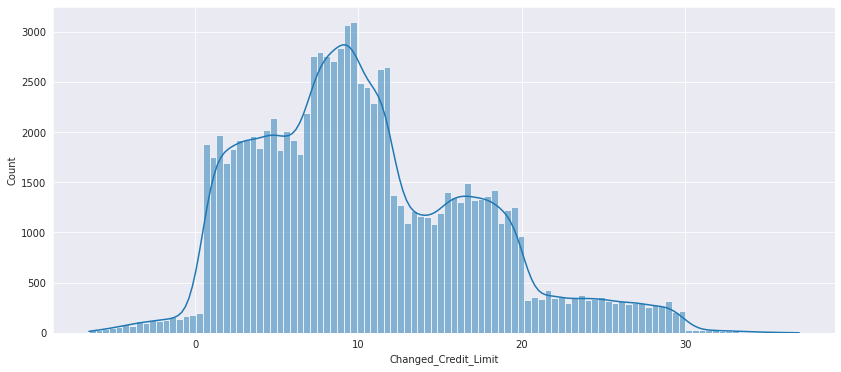

In [172]:
sns.histplot(df['Changed_Credit_Limit'],kde=True)

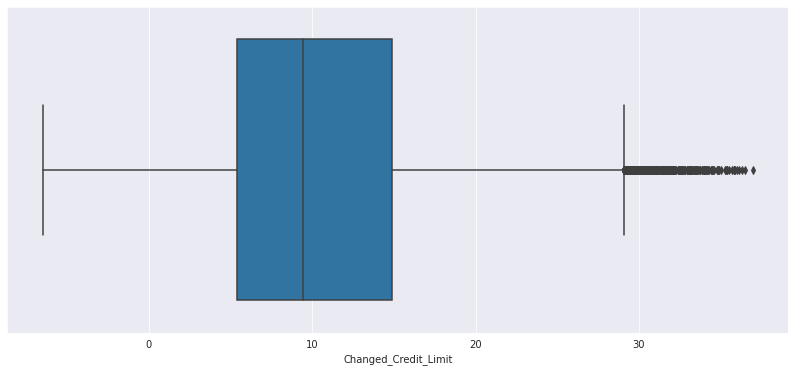

In [173]:
sns.boxplot(df['Changed_Credit_Limit'])

In [174]:
df[df['Changed_Credit_Limit']<0].shape

(1563, 44)

### Changed_Credit_Limit Imputation Using KNNImputer

In [175]:
col = [x for x in df.loc[:,'ID':'Changed_Credit_Limit'].columns if df[x].dtype !='O']
test_col = [x for x in test.loc[:,'ID':'Changed_Credit_Limit'].columns if test[x].dtype !='O']
X = df.loc[:,col]
test_X = test.loc[:,test_col]
X.head()
test_X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit
493,49.0,94554.87,7914.572500,2,6,2,0.0,11,1314.0,9.43
773,19.0,97961.96,8205.496667,4,6,6,0.0,5,2849.0,9.43
774,20.0,97961.96,8205.496667,4,6,6,0.0,7,10.0,9.43
1372,20.0,54987.52,4762.293333,4,5,10,0.0,18,13.0,9.43
1744,43.0,41499.21,3582.267500,0,5,5,0.0,4,6.0,9.18


In [176]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
X_new = imputer.fit_transform(X)
test_X_new = imputer.transform(test_X)

In [177]:
df['Changed_Credit_Limit'] = X_new[:,-1]
test['Changed_Credit_Limit'] = test_X_new[:,-1]

In [178]:
print(test.shape)
df.shape

(50000, 43)


(99356, 44)

### Num_Credit_Inquiries

In [179]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x:str(x).replace("_","")).astype(float)
test['Num_Credit_Inquiries'] = test['Num_Credit_Inquiries'].apply(lambda x:str(x).replace("_","")).astype(float)
df['Num_Credit_Inquiries']

5        4.0
204      4.0
227      9.0
249      7.0
467      4.0
        ... 
69167    4.0
82871    2.0
85628    0.0
89949    0.0
94735    0.0
Name: Num_Credit_Inquiries, Length: 99356, dtype: float64

### Num_Credit_Inquiries Imputation Using KNNImputer

In [180]:
col = [x for x in df.loc[:,'ID':'Num_Credit_Inquiries'].columns if df[x].dtype !='O']
test_col = [x for x in test.loc[:,'ID':'Num_Credit_Inquiries'].columns if test[x].dtype !='O']
X = df.loc[:,col]
test_X = test.loc[:,test_col]
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
5,33.0,2018602.0,1684.168333,1,5,1,2.0,5,6.0,13.0850,4.0
204,33.0,2914388.0,2257.656667,8,1165,14,3.0,10,10.0,8.3625,4.0
227,33.0,3210752.0,2537.626667,9,9,16,3.0,24,24.0,8.7000,9.0
249,33.0,1559068.0,1298.223333,7,9,26,100.0,47,19.0,15.2325,7.0
467,33.0,833345.0,6918.541667,5,1303,3,3.0,2,3.0,4.7500,4.0


In [181]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
X_new = imputer.fit_transform(X)
test_X_new = imputer.transform(test_X)
df['Num_Credit_Inquiries'] = X_new[:,-1]
test['Num_Credit_Inquiries'] = test_X_new[:,-1]

In [182]:
print(test.shape)
df.shape

(50000, 43)


(99356, 44)

### Credit History Age Feature

In [183]:
Credit_History_Age = df[~df['Credit_History_Age'].isna()]
Credit_History_Age_nan = df[df['Credit_History_Age'].isna()]
Credit_History_Age['Credit_History_Age'].value_counts()

15 Years and 11 Months    445
17 Years and 11 Months    443
19 Years and 5 Months     442
19 Years and 4 Months     442
19 Years and 3 Months     438
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      11
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [184]:
test_Credit_History_Age = df[~df['Credit_History_Age'].isna()]
test_Credit_History_Age_nan = df[df['Credit_History_Age'].isna()]

In [185]:
def extract_year_mon(string):
    string = str(string)
    # print(string)
    l = string.split(" ")
    l = [al for al in l if al.isnumeric()]
    return (round((int(l[0])+int(l[1])/12),2))


In [186]:
Credit_History_Age['Credit_History_Age'] = Credit_History_Age['Credit_History_Age'].apply(lambda x:extract_year_mon(x))
test_Credit_History_Age['Credit_History_Age'] = test_Credit_History_Age['Credit_History_Age'].apply(lambda x:extract_year_mon(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [187]:
Credit_History_Age['Credit_History_Age']

5        18.50
204      15.67
227       7.58
467      19.58
542      13.75
         ...  
69167    22.25
82871    20.58
85628    19.58
89949    30.08
94735    18.58
Name: Credit_History_Age, Length: 90378, dtype: float64

### Credit History Age KNN Imputation

In [188]:
col = [x for x in df.loc[:,'ID':'Credit_History_Age'].columns if df[x].dtype !='O']
test_col = [x for x in test.loc[:,'ID':'Credit_History_Age'].columns if test[x].dtype !='O']
X = df.loc[:,col]
test_X = test.loc[:,test_col]
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio
5,33.0,2018602.0,1684.168333,1,5,1,2.0,5,6.0,13.0850,4.0,22.743582
204,33.0,2914388.0,2257.656667,8,1165,14,3.0,10,10.0,8.3625,4.0,39.470542
227,33.0,3210752.0,2537.626667,9,9,16,3.0,24,24.0,8.7000,9.0,31.595624
249,33.0,1559068.0,1298.223333,7,9,26,100.0,47,19.0,15.2325,7.0,32.625914
467,33.0,833345.0,6918.541667,5,1303,3,3.0,2,3.0,4.7500,4.0,39.072946


In [189]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
X_new = imputer.fit_transform(X)
test_X_new = imputer.transform(test_X)
df['Credit_History_Age'] = X_new[:,-1]
test['Credit_History_Age'] = test_X_new[:,-1]

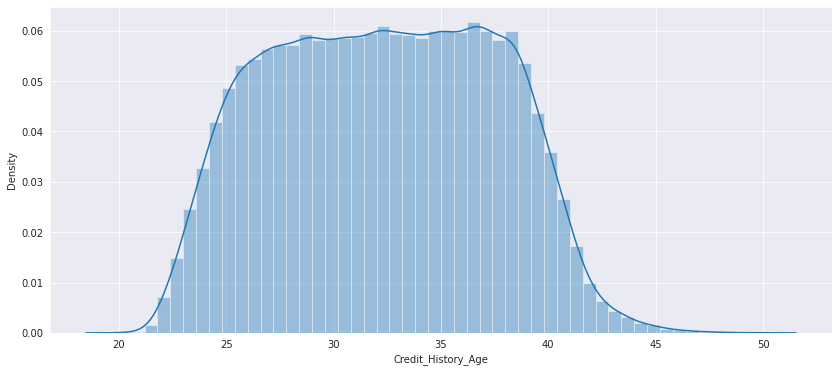

In [190]:
sns.distplot(df['Credit_History_Age'])

In [191]:
df.isnull().sum()

ID                                0
Month                             0
Age                               0
Occupation                        0
Annual_Income                     0
Monthly_Inhand_Salary             0
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Interest_Rate                     0
Num_of_Loan                       0
Type_of_Loan                      0
Delay_from_due_date               0
Num_of_Delayed_Payment            0
Changed_Credit_Limit              0
Num_Credit_Inquiries              0
Credit_Mix                        0
Outstanding_Debt                  0
Credit_Utilization_Ratio          0
Credit_History_Age                0
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly        4453
Payment_Behaviour                 0
Monthly_Balance                1193
Credit_Score                      0
Type_of_Loan_missing              0
and home equity loan              0
not specified               

In [192]:
test.isnull().sum()

ID                                0
Month                             0
Age                               0
Occupation                        0
Annual_Income                     0
Monthly_Inhand_Salary             0
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Interest_Rate                     0
Num_of_Loan                       0
Type_of_Loan                      0
Delay_from_due_date               0
Num_of_Delayed_Payment            0
Changed_Credit_Limit              0
Num_Credit_Inquiries              0
Credit_Mix                        0
Outstanding_Debt                  0
Credit_Utilization_Ratio          0
Credit_History_Age                0
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly        2271
Payment_Behaviour                 0
Monthly_Balance                 562
Type_of_Loan_missing              0
and home equity loan              0
not specified                     0
and debt consolidation loan 

In [193]:
test.shape

(50000, 43)

### Num_Credit_Inquiries Feature

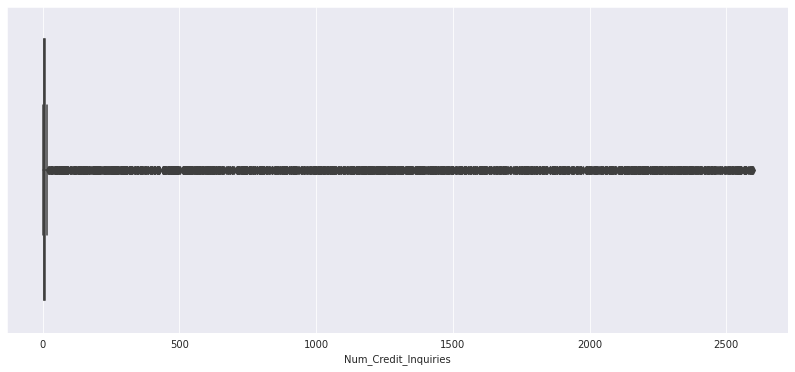

In [194]:
sns.boxplot(df['Num_Credit_Inquiries'])

In [195]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x:str(x).replace("_","")).astype(float)
test['Outstanding_Debt'] = test['Outstanding_Debt'].apply(lambda x:str(x).replace("_","")).astype(float)

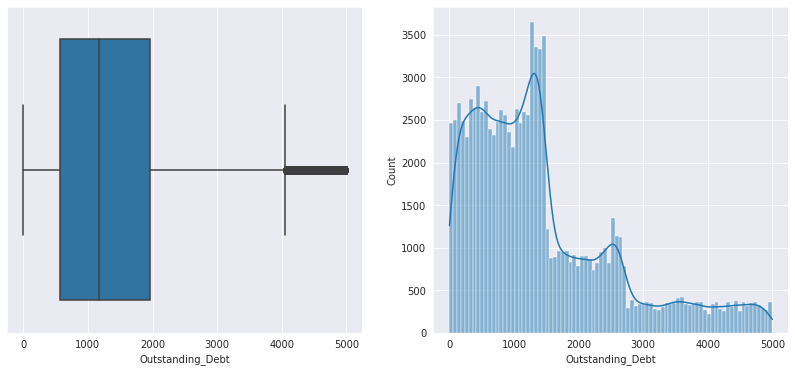

In [196]:
fig,(ax1,ax2) = plt.subplots(1,2)
sns.boxplot(df['Outstanding_Debt'],ax=ax1)
sns.histplot(df['Outstanding_Debt'],kde=True,ax=ax2)

### Payment_of_Min_Amount Feature

In [197]:
df['Payment_of_Min_Amount']

5         No
204       No
227       NM
249      Yes
467       No
        ... 
69167     No
82871     No
85628     NM
89949     No
94735     NM
Name: Payment_of_Min_Amount, Length: 99356, dtype: object

In [198]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

### Total_EMI_per_month Feature

In [199]:
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].astype(int)
test['Total_EMI_per_month'] = test['Total_EMI_per_month'].astype(int)

In [200]:
df['Total_EMI_per_month']

5         29
204       45
227       70
249       92
467      168
        ... 
69167      0
82871      0
85628      0
89949      0
94735      0
Name: Total_EMI_per_month, Length: 99356, dtype: int64

### Amount_invested_monthly Feature

In [201]:
Amount_invested_monthly = df[~df['Amount_invested_monthly'].isna()]
Amount_invested_monthly_nan = df[df['Amount_invested_monthly'].isna()]

In [202]:
test_Amount_invested_monthly = test[~test['Amount_invested_monthly'].isna()]
test_Amount_invested_monthly_nan = test[test['Amount_invested_monthly'].isna()]

In [203]:
col = [x for x in df.loc[:,'ID':'Amount_invested_monthly'].columns if df[x].dtype !='O']
test_col = [x for x in test.loc[:,'ID':'Amount_invested_monthly'].columns if test[x].dtype !='O']
X = df.loc[:,col]
test_X = test.loc[:,test_col]
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month
5,33.0,2018602.0,1684.168333,1,5,1,2.0,5,6.0,13.0850,4.0,413.32,22.743582,22.743582,29
204,33.0,2914388.0,2257.656667,8,1165,14,3.0,10,10.0,8.3625,4.0,518.69,39.470542,39.470542,45
227,33.0,3210752.0,2537.626667,9,9,16,3.0,24,24.0,8.7000,9.0,1295.13,31.595624,31.595624,70
249,33.0,1559068.0,1298.223333,7,9,26,100.0,47,19.0,15.2325,7.0,4746.44,32.625914,32.625914,92
467,33.0,833345.0,6918.541667,5,1303,3,3.0,2,3.0,4.7500,4.0,1188.93,39.072946,39.072946,168


### Amount_invested_monthly Imputation Using KNNImputer

In [204]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
X_new = imputer.fit_transform(X)
test_X_new = imputer.transform(test_X)
df['Amount_invested_monthly'] = X_new[:,-1]
test['Amount_invested_monthly'] = test_X_new[:,-1]

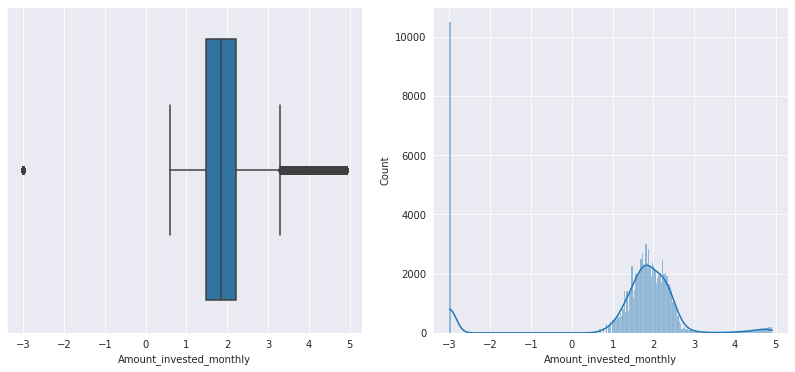

In [205]:
# Log scale Plot
fig,(ax1,ax2) = plt.subplots(1,2)
sns.boxplot(np.log10(df['Amount_invested_monthly']+0.001),ax=ax1)
sns.histplot(np.log10(df['Amount_invested_monthly']+0.001),kde=True,ax=ax2)

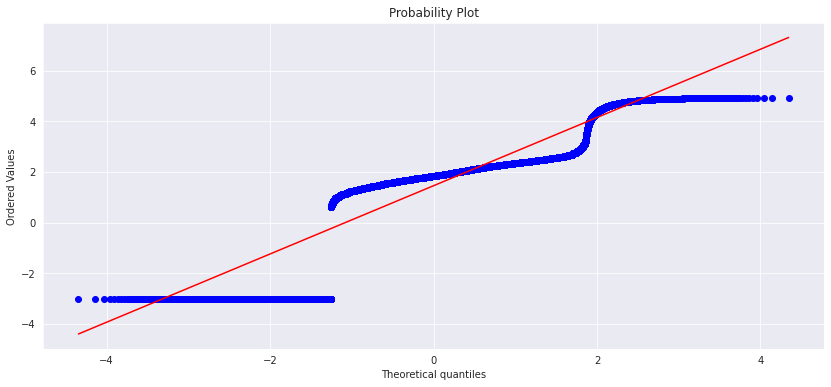

In [206]:
# Not log normal Disb
import numpy as np 
import pylab 
import scipy.stats as stats

# measurements = np.random.normal(loc = 20, scale = 5, size=100)   
measurements = np.log10(df['Amount_invested_monthly']+0.001)
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

### Payment_Behaviour Feature 

In [207]:
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_missing,and home equity loan,not specified,and debt consolidation loan,and not specified,mortgage loan,and personal loan,personal loan,auto loan,and mortgage loan,home equity loan,debt consolidation loan,student loan,and auto loan,payday loan,and credit-builder loan,credit-builder loan,and student loan,and payday loan
5,0x176d,April,33.0,Scientist,2018602.0,1684.168333,1,5,1,2.0,"Auto Loan, and Home Equity Loan",5,6.0,13.0850,4.0,Good,413.32,22.743582,22.743582,No,29,29.0,High_spent_Small_value_payments,294.1584160682732,Good,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0x3c0a,May,33.0,_______,2914388.0,2257.656667,8,1165,14,3.0,"Payday Loan, Auto Loan, and Credit-Builder Loan",10,10.0,8.3625,4.0,Standard,518.69,39.470542,39.470542,No,45,45.0,Low_spent_Large_value_payments,324.0010765794081,Standard,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
227,0x405a,May,33.0,_______,3210752.0,2537.626667,9,9,16,3.0,"Student Loan, Payday Loan, and Not Specified",24,24.0,8.7000,9.0,_,1295.13,31.595624,31.595624,NM,70,70.0,Low_spent_Small_value_payments,231.3386012226157,Poor,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
249,0x4430,March,33.0,_______,1559068.0,1298.223333,7,9,26,100.0,"Mortgage Loan, Credit-Builder Loan, Personal L...",47,19.0,15.2325,7.0,Bad,4746.44,32.625914,32.625914,Yes,92,92.0,Low_spent_Medium_value_payments,232.97719293250358,Standard,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
467,0x761f,June,33.0,Mechanic,833345.0,6918.541667,5,1303,3,3.0,"Debt Consolidation Loan, Mortgage Loan, and Ho...",2,3.0,4.7500,4.0,_,1188.93,39.072946,39.072946,No,168,168.0,High_spent_Large_value_payments,624.1510108491508,Standard,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
len(df['Payment_Behaviour'].unique())

7

### Monthly_Balance Feature

In [209]:
Monthly_Balance = df[~df['Monthly_Balance'].isna()]
Monthly_Balance['Monthly_Balance'] = Monthly_Balance['Monthly_Balance'].apply(lambda x:str(x).replace("_","")).astype(float).round(2)
Monthly_Balance_nan = df[df['Monthly_Balance'].isna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [210]:
test_Monthly_Balance = test[~test['Monthly_Balance'].isna()]
test_Monthly_Balance['Monthly_Balance'] = test_Monthly_Balance['Monthly_Balance'].apply(lambda x:str(x).replace("_","")).astype(float).round(2)
test_Monthly_Balance_nan = test[test['Monthly_Balance'].isna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [211]:
df.shape

(99356, 44)

In [212]:
test = pd.concat([test_Monthly_Balance,test_Monthly_Balance_nan],axis=0)
test.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Type_of_Loan_missing,and home equity loan,not specified,and debt consolidation loan,and not specified,mortgage loan,and personal loan,personal loan,auto loan,and mortgage loan,home equity loan,debt consolidation loan,student loan,and auto loan,payday loan,and credit-builder loan,credit-builder loan,and student loan,and payday loan
493,0x1bcf,October,49.0,Media_Manager,94554.87,7914.572500,2,6,2,0.0,"Credit-Builder Loan, Debt Consolidation Loan,...",11,1314.0,9.43,3.0,_,1487.90,35.229642,35.229642,No,0,0.0,Low_spent_Large_value_payments,550.02,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
773,0x1f17,October,19.0,_______,97961.96,8205.496667,4,6,6,0.0,"Not Specified, Payday Loan, Mortgage Loan",5,2849.0,9.43,3.0,Good,750.95,25.476098,25.476098,No,0,0.0,Low_spent_Medium_value_payments,332.94,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
774,0x1f18,November,20.0,Lawyer,97961.96,8205.496667,4,6,6,0.0,"Personal Loan, Credit-Builder Loan, Not Speci...",7,10.0,9.43,3.0,Good,750.95,38.499224,38.499224,No,0,0.0,Low_spent_Medium_value_payments,355.43,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1372,0x261e,September,20.0,Scientist,54987.52,4762.293333,4,5,10,0.0,"Student Loan, Credit-Builder Loan, Auto Loan",18,13.0,9.43,8.0,_,1263.12,34.123116,34.123116,Yes,0,0.0,Low_spent_Small_value_payments,226.12,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1744,0x2a7a,September,43.0,Architect,41499.21,3582.267500,0,5,5,0.0,"Payday Loan, Credit-Builder Loan, Home Equity...",4,6.0,9.18,4.0,Good,1272.15,35.555339,35.555339,NM,0,0.0,High_spent_Large_value_payments,523.23,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [213]:
df = pd.concat([Monthly_Balance,Monthly_Balance_nan],axis=0)
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_missing,and home equity loan,not specified,and debt consolidation loan,and not specified,mortgage loan,and personal loan,personal loan,auto loan,and mortgage loan,home equity loan,debt consolidation loan,student loan,and auto loan,payday loan,and credit-builder loan,credit-builder loan,and student loan,and payday loan
5,0x176d,April,33.0,Scientist,2018602.0,1684.168333,1,5,1,2.0,"Auto Loan, and Home Equity Loan",5,6.0,13.0850,4.0,Good,413.32,22.743582,22.743582,No,29,29.0,High_spent_Small_value_payments,294.16,Good,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0x3c0a,May,33.0,_______,2914388.0,2257.656667,8,1165,14,3.0,"Payday Loan, Auto Loan, and Credit-Builder Loan",10,10.0,8.3625,4.0,Standard,518.69,39.470542,39.470542,No,45,45.0,Low_spent_Large_value_payments,324.0,Standard,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
227,0x405a,May,33.0,_______,3210752.0,2537.626667,9,9,16,3.0,"Student Loan, Payday Loan, and Not Specified",24,24.0,8.7000,9.0,_,1295.13,31.595624,31.595624,NM,70,70.0,Low_spent_Small_value_payments,231.34,Poor,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
249,0x4430,March,33.0,_______,1559068.0,1298.223333,7,9,26,100.0,"Mortgage Loan, Credit-Builder Loan, Personal L...",47,19.0,15.2325,7.0,Bad,4746.44,32.625914,32.625914,Yes,92,92.0,Low_spent_Medium_value_payments,232.98,Standard,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
467,0x761f,June,33.0,Mechanic,833345.0,6918.541667,5,1303,3,3.0,"Debt Consolidation Loan, Mortgage Loan, and Ho...",2,3.0,4.7500,4.0,_,1188.93,39.072946,39.072946,No,168,168.0,High_spent_Large_value_payments,624.15,Standard,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
col = [x for x in df.loc[:,'ID':'Monthly_Balance'].columns if df[x].dtype !='O']
test_col = [x for x in test.loc[:,'ID':'Monthly_Balance'].columns if test[x].dtype !='O']
X = df.loc[:,col]
test_X = test.loc[:,test_col]
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly
5,33.0,2018602.0,1684.168333,1,5,1,2.0,5,6.0,13.0850,4.0,413.32,22.743582,22.743582,29,29.0
204,33.0,2914388.0,2257.656667,8,1165,14,3.0,10,10.0,8.3625,4.0,518.69,39.470542,39.470542,45,45.0
227,33.0,3210752.0,2537.626667,9,9,16,3.0,24,24.0,8.7000,9.0,1295.13,31.595624,31.595624,70,70.0
249,33.0,1559068.0,1298.223333,7,9,26,100.0,47,19.0,15.2325,7.0,4746.44,32.625914,32.625914,92,92.0
467,33.0,833345.0,6918.541667,5,1303,3,3.0,2,3.0,4.7500,4.0,1188.93,39.072946,39.072946,168,168.0


In [215]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
X_new = imputer.fit_transform(X)
test_X_new = imputer.transform(test_X)
df['Monthly_Balance'] = X_new[:,-1]
test['Monthly_Balance'] = test_X_new[:,-1]

In [216]:
test.isnull().sum()

ID                             0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Type_of_Loan_missing           0
and home equity loan           0
not specified                  0
and debt consolidation loan    0
and not specified              0
mortgage loan                  0
and person

In [217]:
df.isnull().sum()

ID                             0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Type_of_Loan_missing           0
and home equity loan           0
not specified                  0
and debt consolidation loan    0
and not specified              0
mortgage l

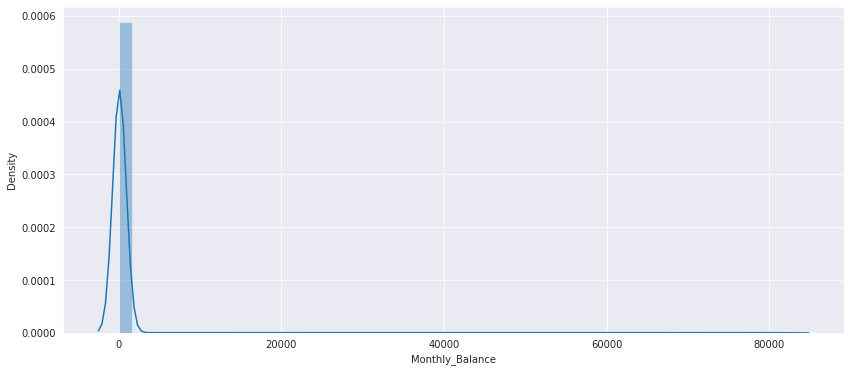

In [218]:
sns.distplot(df['Monthly_Balance'])

In [219]:
df.to_csv("/content/drive/MyDrive/Major Project/basic_preprocessed.csv",index=False)

In [220]:
test.to_csv("/content/drive/MyDrive/Major Project/test_basic_preprocessed.csv",index=False)